In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
import os

In [130]:
temp = pd.DataFrame(columns=['filename', 'score'])
temp_csv = 's1'
temp_csv2 = 's2'
temp_score = 0.12
temp_score2 = 0.11
temp.loc[temp.shape[0]+1] = {'filename': temp_csv, 'score': temp_score}
temp.loc[temp.shape[0]+1] = {'filename': temp_csv2, 'score': temp_score2}
temp

,filename,score
1,s1,0.12
2,s2,0.11


In [320]:
data_dir = '../data/planetlab'
def find_smooth_load(root):
    res = pd.DataFrame(columns=['filename', 'score'])
    
    for d in os.listdir(root):
        child = os.path.join(root, d)
        print(child)
        if os.path.isdir(child):
            for csv in os.listdir(child)[:10]:
#                 print(csv)
                csv = os.path.join(child, csv)
                df = pd.read_csv(csv)
                df.columns = ['load']
                df = df.dropna()
                ts = df['load']
                flag, score = is_smooth(acf(ts))
                print(csv)
                if flag:
#                     print('find:', csv)
                    res.loc[res.shape[0]+1] = {'filename': csv, 'score': score}
    return res

In [321]:
smooth_res = find_smooth_load(data_dir)
smooth_res

../data/planetlab/20110403
../data/planetlab/20110403/planetlab2_uta_edu_uw_oneswarm
../data/planetlab/20110403/host2_planetlab_informatik_tu-darmstadt_de_utokyo_sora
../data/planetlab/20110403/planetlab2_elet_polimi_it_irisaple_HEAP
../data/planetlab/20110403/planetlab1_wiwi_hu-berlin_de_princeton_codeen
../data/planetlab/20110403/fobos_cecalc_ula_ve_root
../data/planetlab/20110403/planetlab2_millennium_berkeley_edu_ethzcs_tracegatherer
../data/planetlab/20110403/planetlab-1_cs_uh_edu_due_test
../data/planetlab/20110403/planetlab3_cnds_jhu_edu_uofathens_zoi
../data/planetlab/20110403/pl1_planet_cs_kent_edu_umn_net_tools
../data/planetlab/20110403/plgmu1_ite_gmu_edu_root
../data/planetlab/.DS_Store
../data/planetlab/20110303
../data/planetlab/20110303/146-179_surfsnel_dsl_internl_net_colostate_557
../data/planetlab/20110303/planetlab2_uta_edu_uw_oneswarm
../data/planetlab/20110303/planetlab-node1_it-sudparis_eu_tum_i2p
../data/planetlab/20110303/planetlab1_cs_purdue_edu_purdue_2
../dat

,filename,score
1,../data/planetlab/20110403/host2_planetlab_inf...,0.201909
2,../data/planetlab/20110403/planetlab2_elet_pol...,0.153573
3,../data/planetlab/20110403/fobos_cecalc_ula_ve...,0.114489
4,../data/planetlab/20110403/planetlab2_millenni...,0.136999
5,../data/planetlab/20110403/planetlab-1_cs_uh_e...,0.227010
6,../data/planetlab/20110403/pl1_planet_cs_kent_...,0.102208
7,../data/planetlab/20110403/plgmu1_ite_gmu_edu_...,0.172230
8,../data/planetlab/20110303/146-179_surfsnel_ds...,0.068951
9,../data/planetlab/20110303/planetlab2_uta_edu_...,0.295394
10,../data/planetlab/20110303/planetlab-node1_it-...,0.242409


In [322]:
smooth_res['abs_score'] = abs(smooth_res['score'])
smooth_res.sort_values('abs_score', inplace=True)
smooth_res

,filename,score,abs_score
50,../data/planetlab/20110322/host2_planetlab_inf...,0.036682,0.036682
8,../data/planetlab/20110303/146-179_surfsnel_ds...,0.068951,0.068951
48,../data/planetlab/20110325/plab1_engr_sjsu_edu...,0.070613,0.070613
39,../data/planetlab/20110409/planetlab2_exp-math...,0.075245,0.075245
67,../data/planetlab/20110309/fobos_cecalc_ula_ve...,0.079670,0.079670
46,../data/planetlab/20110325/planetlab2_exp-math...,0.079785,0.079785
41,../data/planetlab/20110325/host2_planetlab_inf...,0.090787,0.090787
13,../data/planetlab/20110303/fobos_cecalc_ula_ve...,0.092869,0.092869
6,../data/planetlab/20110403/pl1_planet_cs_kent_...,0.102208,0.102208
47,../data/planetlab/20110325/planetlab3_netmedia...,0.105118,0.105118


In [334]:
smooth_res.iloc[48]['filename']

'../data/planetlab/20110306/planetlab1_cs_purdue_edu_purdue_2'

In [332]:
first_smooth = smooth_res.iloc[48]['filename']
df = pd.read_csv(first_smooth)
df.columns = ['load']
df = df.dropna()
ts = acf(df['load'])
is_smooth(ts)

(True, 0.19671953591183583)

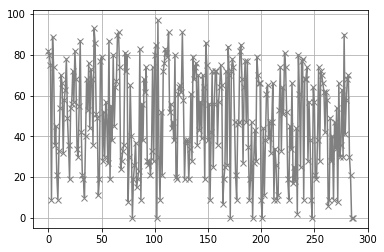

In [333]:
plt.plot(df, color='gray', linestyle='-', marker='x')
plt.grid()
plt.show()

In [314]:
csv = os.path.join(data_dir, '20110303', 'ait05_us_es_root')
df = pd.read_csv(csv)

In [8]:
df.shape, df.columns

((287, 1), Index(['2'], dtype='object'))

In [315]:
df.columns = ['load']
df.shape, df.columns

((287, 1), Index(['load'], dtype='object'))

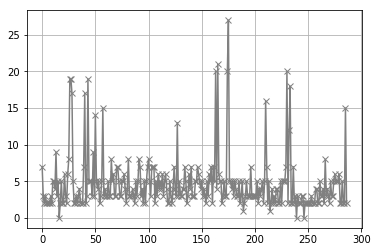

In [316]:
df = df.dropna()
plt.plot(df, color='gray', linestyle='-', marker='x')
plt.grid()
plt.show()

In [317]:
from statsmodels.tsa.stattools import adfuller as ADF
dftest = ADF(df['load'])
# 结果符合平稳序列
print(dftest)

(-13.192640923719955, 1.1358624003544769e-24, 0, 286, {'1%': -3.4534232986669546, '5%': -2.8716994185534745, '10%': -2.5721833625116144}, 1484.0478483980992)


In [103]:
def auto_corr(ts, k):
    l = len(ts)
    ts1 = ts[:l-k]
    ts2 = ts[k:]
    ts_mean = ts.mean()
    ts_var = np.array([i**2 for i in ts - ts_mean]).sum()
    auto_corr = 0.0
    for i in range(l-k):
        auto_corr += (ts1[i] - ts_mean) * (ts2[i+k] - ts_mean) / ts_var
    return auto_corr

def auto_corr_series(ts):
    acs = np.array([])
    l = len(ts)
    for i in range(1, math.ceil(l/3)):
            acs = np.append(acs, auto_corr(ts, i))
    return acs

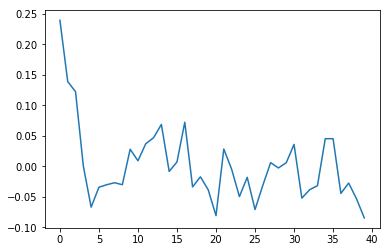

In [319]:
acs = acf(df['load'])
plt.plot(acs[1:])

In [240]:
is_smooth(acs)

(True, 0.06895090473379975)

In [239]:
from scipy import stats
def is_smooth(P, u=0, alpha=0.05):
    t, p = stats.ttest_1samp(P, u)
    is_smooth = (p > 0.05)
    score = (P.mean() - u) / (P.std())
    return is_smooth, score

In [238]:
l1, l2 = [1,4,5,6], [3,4,2,8]
s1 = pd.Series(l1)
s2 = pd.Series(l2)
print(auto_corr(s1, 1))
auto_corr_series(s1)

0.14285714285714285


array([0.14285714])

In [36]:
a, b = s1.mean(), s2.mean()
n = len(l1) if len(l1) == len(l2) else -1
sum = 0.0
if n != -1:
    for i in range(n):
        sum += (l1[i] - a)*(l2[i] - b)
print(sum)

9.0


In [43]:
s1.var(), s1.size

(4.666666666666667, 4)

In [42]:
std = 0.0
for i in range(n):
    std += pow(l1[i] - a, 2) / 3
print(std)

4.666666666666667


In [50]:
from statsmodels.tsa.stattools import acf

In [85]:
s3 = pd.Series([1,3,4,5,6,3,4])
acf(s1)

array([ 1.        ,  0.14285714, -0.21428571, -0.42857143])

In [55]:
l = len(s1)
s1[:l-1], s1[1:]

(0    1
 1    4
 2    5
 dtype: int64, 1    4
 2    5
 3    6
 dtype: int64)